#### Objective : 

Based on 30 physical attributes of a tumor, for a given combination of those attributes we are required to determine whether 
the tumor is Malignant or Benign. Since the number of attributes invloved is high therefore we will approach the classification objective by extracting the most relevant set of features from the dataset using two techniques, recursive Feature Elimination(RFE) and Cross validation assisted Recursive Feature Elimination(RFECV).

Data Source : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

**Input Features :**

 1) 'radius_mean' 
 
 2) 'texture_mean' 
 
 3) 'perimeter_mean'
 
 4) 'area_mean'
 
 5) 'smoothness_mean'
 
 6) 'compactness_mean'
 
 7) 'concavity_mean'
 
 8) 'concave points_mean'
 
 9) 'symmetry_mean'
 
 10) 'fractal_dimension_mean'
 
 11) 'radius_se'
 
 12) 'texture_se'
 
 13) 'perimeter_se'
 
 14) 'area_se'
 
 15) 'smoothness_se'
 
 16) 'compactness_se'
 
 17) 'concavity_se'
 
 18) 'concave points_se'
 
 19) 'symmetry_se'
 
 20) 'fractal_dimension_se'
 
 21) 'radius_worst'
 
 22) 'texture_worst'
 
 23) 'perimeter_worst'
 
 24) 'area_worst'
 
 25) 'smoothness_worst'
 
 26) 'compactness_worst'
 
 27) 'concavity_worst'
 
 28) 'concave points_worst'
 
 29) 'symmetry_worst'
 
 30) 'fractal_dimension_worst'
 
**Target Feature**
      
 31) Diagnosis (M=Malignant, B=Beningn)

#### 1) Recursive Feature Elimination(RFE)  :

*Recursive Feature Elimination (RFE)* is a technique that involves either a linear-model (*LogisticRegression, SVC*) or a tree based model(*DecisionTreeClassifier, RandomForestClassifier*) to obtain the most relevant set of features when performing classification or regression. Among one of its arguments, RFE takes *n_features* which is nothing but the number of features that we want to choose from among all the features of the datset. RFE works in the following way, for each iteration  the classification model is trained on all the features of the dataset. Depending upon whether the classifier is based on a tree-model or a linear-model, the features are designated either *weights/coefficients* or *feature-importances*. The feature that corresponds to the worst value is eliminated and the dataset is transformed to accomodate the remaining features. This process is continued until we are left with only *n_features*. 

#### Demonstrating RFE :

#### 1.1) Importing the relevant libraries and Loading the Dataset :

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

#loading the dataset
breast_cancer=pd.read_csv('cancer_data.csv')
breast_cancer=breast_cancer.reindex(np.random.permutation(breast_cancer.index))
input_data=breast_cancer.loc[:,'radius_mean':'fractal_dimension_worst']
target_data=breast_cancer.loc[:,'diagnosis']
input_features=input_data.columns

breast_cancer.head()

Populating the interactive namespace from numpy and matplotlib


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
92,861853,B,13.27,14.76,84.74,551.7,0.07355,0.05055,0.03261,0.02648,...,22.35,104.5,830.6,0.10060,0.1238,0.1350,0.10010,0.2027,0.06206,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.5,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
343,898431,M,19.68,21.68,129.90,1194.0,0.09797,0.13390,0.18630,0.11030,...,34.66,157.6,1540.0,0.12180,0.3458,0.4734,0.22550,0.4045,0.07918,NaN
375,901303,B,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,...,19.14,113.1,861.5,0.12350,0.2550,0.2114,0.12510,0.3153,0.08960,NaN
217,8811779,B,10.20,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,...,24.47,75.4,403.7,0.09527,0.1397,0.1925,0.03571,0.2868,0.07809,NaN


#### 1.2) Data Preprocessing :

In [2]:
#Label encoding the target feature :
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
target_data=encoder.fit_transform(target_data)

#splitting the dataset into training and testing sets:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(input_data,target_data,test_size=200,random_state=0)

#standardizing the training and testing sets:
from sklearn.preprocessing import StandardScaler 
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)
X_train=pd.DataFrame(data=X_train,columns=input_features)
X_test=pd.DataFrame(data=X_test,columns=input_features)

#### 1.3) Applying Logistic Regression classifier on all the features :

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
logreg_clf=LogisticRegression()
logreg_clf.fit(X_train,Y_train)
Y_pred=logreg_clf.predict(X_test)
CM=confusion_matrix(Y_test,Y_pred)
print('CONFUSION_MATRIX: \n',CM)
print('ACCURACY:', 100*accuracy_score(Y_test,Y_pred))
print('SPECIFICITY :', 100*(CM[0,0]/(CM[0,0]+CM[0,1])))
print('SENSITIVITY :', 100*(CM[1,1]/(CM[1,0]+CM[1,1])))

CONFUSION_MATRIX: 
 [[117   1]
 [  1  81]]
ACCURACY: 99.0
SPECIFICITY : 99.15254237288136
SENSITIVITY : 98.78048780487805


#### 1.4) Applying RFE :

In [4]:
from sklearn.feature_selection import RFE
feature_selector=RFE(estimator=LogisticRegression(),n_features_to_select=8)
feature_selector.fit(X_train,Y_train)
print('SELECTED ATTRIBUTES:',X_train.columns[feature_selector.support_])

SELECTED ATTRIBUTES: Index(['concave points_mean', 'radius_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


#### 1.5) Modifying the original training  and testing sets so that only the extracted features are contained in them :


In [5]:
X_train=X_train[X_train.columns[feature_selector.support_]]
X_test=X_test[X_test.columns[feature_selector.support_]]

#### 1.6) Training and evaluating the classiier on the modified training set and testing set respectively :

In [6]:
logreg_clf.fit(X_train,Y_train)
Y_pred=logreg_clf.predict(X_test)
CM=confusion_matrix(Y_test,Y_pred)
print('CONFUSION_MATRIX: \n',CM)
print('ACCURACY:', 100*accuracy_score(Y_test,Y_pred))
print('SPECIFICITY :', 100*(CM[0,0]/(CM[0,0]+CM[0,1])))
print('SENSITIVITY :', 100*(CM[1,1]/(CM[1,0]+CM[1,1])))

CONFUSION_MATRIX: 
 [[115   3]
 [  1  81]]
ACCURACY: 98.0
SPECIFICITY : 97.45762711864407
SENSITIVITY : 98.78048780487805


#### 1.7) Conclusion :

When 8 most relevant features were chosen from among 30 input features, the accuracy on the modified testing set set using the LogisticRegression classifier's taking into account those 8 features was features was 98%, whereas, the accuracy on the original testing set was 99%.

#### 2) Cross Validation assisted Recursive Feature Elimination(RFECV) :

The *Cross Validation assisted Recursive Feature Elimination(RFECV)* is different from RFE in the sense that, in RFE we were required to specify the number of features we would like to select from among all the features of the dataset, however, RFECV does the opposite. For each validation set, RFE is performed till all the features have been exhausted. For each validation set,we detrmine the *optimal feature count* corresponding to which the accuracy of the classifier was the highest. Now that the *optimal feature count* has been determined for each validation set, among all those *optimal feature counts* RFECV determines the one corresponds to the highest classification score.

#### Demonstrating Cross Validation assisted Recursive Feature Elimination :

#### 2.1) Importing the relevant libraries and Loading the Dataset :

In [7]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

#loading the dataset
breast_cancer=pd.read_csv('cancer_data.csv')
breast_cancer=breast_cancer.reindex(np.random.permutation(breast_cancer.index))
input_data=breast_cancer.loc[:,'radius_mean':'fractal_dimension_worst']
target_data=breast_cancer.loc[:,'diagnosis']
input_features=input_data.columns

breast_cancer.head()

Populating the interactive namespace from numpy and matplotlib


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
357,901028,B,13.87,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.02088,...,25.58,96.74,694.4,0.11530,0.10080,0.05285,0.05556,0.2362,0.07113,NaN
192,875099,B,9.72,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,...,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559,NaN
91,861799,M,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,...,25.84,107.50,830.9,0.12570,0.19970,0.28460,0.14760,0.2556,0.06828,NaN
75,8610404,M,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,...,24.56,128.80,1223.0,0.15000,0.20450,0.28290,0.15200,0.2650,0.06387,NaN
331,896864,B,12.98,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.02950,...,21.95,99.21,634.3,0.12880,0.32530,0.34390,0.09858,0.3596,0.09166,NaN


#### 2.2) Data Preprocessing

In [8]:
#Label encoding the target feature :
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
target_data=encoder.fit_transform(target_data)

#splitting the dataset into training and testing sets:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(input_data,target_data,test_size=200,random_state=0)

#standardizing the training and testing sets:
from sklearn.preprocessing import StandardScaler 
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)
X_train=pd.DataFrame(data=X_train,columns=input_features)
X_test=pd.DataFrame(data=X_test,columns=input_features)

#### 3.2) Applying Logistic Regression Classifier:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
logreg_clf=LogisticRegression()
logreg_clf.fit(X_train,Y_train)
Y_pred=logreg_clf.predict(X_test)
CM=confusion_matrix(Y_test,Y_pred)
print('CONFUSION_MATRIX: \n',CM)
print('ACCURACY:', 100*accuracy_score(Y_test,Y_pred))
print('SPECIFICITY :', 100*(CM[0,0]/(CM[0,0]+CM[0,1])))
print('SENSITIVITY :', 100*(CM[1,1]/(CM[1,0]+CM[1,1])))

CONFUSION_MATRIX: 
 [[134   3]
 [  4  59]]
ACCURACY: 96.5
SPECIFICITY : 97.8102189781022
SENSITIVITY : 93.65079365079364


#### 3.4) Applying RFECV

In [10]:
from sklearn.feature_selection import RFECV
feature_selector=RFECV(estimator=LogisticRegression(),cv=5,scoring='accuracy',step=1)
feature_selector.fit(X_train,Y_train)

print('OPTIMAL NUMBER OF FEATURES:',feature_selector.n_features_)
print('SELECTED ATTRIBUTES:',X_train.columns[feature_selector.support_])


OPTIMAL NUMBER OF FEATURES: 12
SELECTED ATTRIBUTES: Index(['radius_mean', 'perimeter_mean', 'concave points_mean', 'radius_se',
       'area_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst'],
      dtype='object')


#### 3.5) Plotting the variation of Cross Validation scores w.r.t number of features selected :

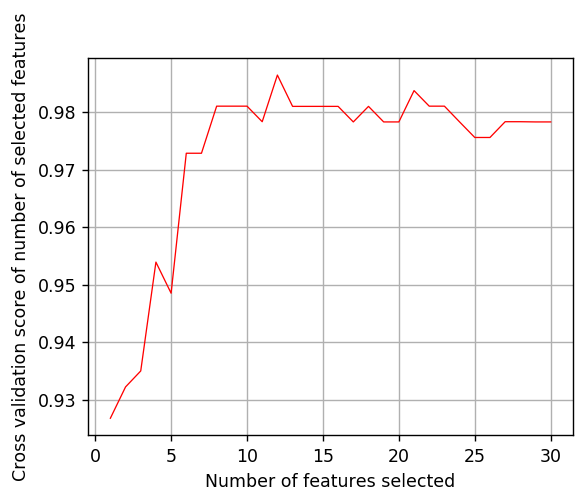

In [11]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,4),dpi=125)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Cross validation score of number of selected features")
ax.plot(range(1, len(feature_selector.grid_scores_) + 1), feature_selector.grid_scores_,color='red',linewidth=0.75)
ax.grid()

#### 3.6) Modifying the original training  and testing sets so that only the extracted features are contained in them :

In [12]:
X_train=X_train[X_train.columns[feature_selector.support_]]
X_test=X_test[X_test.columns[feature_selector.support_]]

#### 3.7) Training and evaluating the classiier on the modified training set and testing set respectively :

In [13]:
logreg_clf.fit(X_train,Y_train)
Y_pred=logreg_clf.predict(X_test)
CM=confusion_matrix(Y_test,Y_pred)
print('CONFUSION_MATRIX: \n',CM)
print('ACCURACY:', 100*accuracy_score(Y_test,Y_pred))
print('SPECIFICITY :', 100*(CM[0,0]/(CM[0,0]+CM[0,1])))
print('SENSITIVITY :', 100*(CM[1,1]/(CM[1,0]+CM[1,1])))

CONFUSION_MATRIX: 
 [[133   4]
 [  5  58]]
ACCURACY: 95.5
SPECIFICITY : 97.08029197080292
SENSITIVITY : 92.06349206349206


#### 3.8) Conclusion:

The application of Cross Validation assisted Recursive Feature Elimination (RFECV) yielded 12 features from among 30 input features of the dataset. The accuracy on the testing set using the LogisticRegression classifier's taking ino account all the input features was 96.5%, whereas, the accuracy on the modified testing set,i.e, the training set containing the selected 12 features was 95.5%.